# Implementación del e-greedy
Se basa en la selección de las estrategias de exploración y explotación de acuerdo con una probabilidad e. Esto lo podemos definir con una función muy sencilla tal y como se muestra a continuación

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
def alg_epsilon_greedy(valores_estimados, epsilon=0.5):
    """
    Lee la documentación de esta función en el notebook.
    """
    if np.random.uniform(0,1) <= epsilon:
        # estrategia de exploración
        return np.random.choice(np.arange(len(valores_estimados)))
    else: 
        return np.argmax(valores_estimados)

La implementación es casi directa a la manera como planteamos las ecuaciones usando una descripción formal. En general, esta función nos devolverá el índice de la acción de acuerdo con la condición: si obtenemos un número aleatorio menor que 𝜀𝜀, la acción será elegida al azar; de lo contrario, la función devolverá la acción que haya generado la mayor recompensa hasta el momento. Es decir, si tenemos una simulación con 100 pasos, en una porción 𝜀𝜀 de los pasos se 
utiliza la estrategia de exploración, mientras que, en la porción restante 1 − 𝜀𝜀, se emplea 
la estrategia greedy. 

Paso 3.
Ahora, debemos definir la manera en la que recompensaremos al agente en caso de 
que elija el brazo adecuado con un valor de la acción bueno. Esta tarea es una de las 
más importantes en el diseño y la resolución de problemas en aprendizaje por refuerzo, 
ya que de ella depende mucho del éxito del entrenamiento. Así las cosas, es 
conveniente aclarar que perfectamente podemos tomar el valor de las muestras que 
simulamos antes usando una distribución normal. Sin embargo, utilizaremos una 
versión aún más sencilla para que veas la versatilidad y flexibilidad de la metodología. 
No te preocupes, más adelante usaremos los datos que simulamos. Entonces, con el 
siguiente código definimos la función de recompensa que nos devolverá un +1 si el 
valor de nuestra acción es “bueno” o un -1 si este valor es “malo”. Como te puedes dar 
cuenta, esta implementación es bastante sencilla y podría incluir más información útil 
sobre el estado del entorno.

In [2]:
def fun_recompensa(accion, valores_deseados):
    """
    Lee la documentación de esta función en el notebook
    """
    if np.random.rand() <= valores_deseados[accion]:
        return 1
    else:
        return -1

Muy bien, ya con las dos funciones o métodos que hemos descrito anteriormente es 
posible construir el procedimiento que dé lugar a la simulación de un bandido con 
múltiples brazos. A esta simulación le vamos a llamar bandido simple, ya que es la 
implementación más sencilla de solución problema, es decir, utilizando el algoritmo 
𝜖𝜖-greedy. En el código puedes notar los parámetros de entrada para la simulación. En 
primer lugar, están los valores esperados o teóricos para cada una de las acciones; 
esos mismos que generamos antes de simular las muestras aleatorias. Luego vienen 
los parámetros que ya teníamos presentes, como son el número de brazos, el número 
de pasos y la probabilidad 𝜀𝜀. Como te puedes dar cuenta, cada uno de estos 
parámetros, tiene su valor por defecto, excepto la lista de valores deseados. En la 
primera parte de la función, inicializamos los registros para las recompensas y las 
comprobaciones de si la acción elegida corresponde a la óptima. Seguidamente, 
inicializamos las listas para 𝑄𝑄 y 𝑁𝑁 que contendrán tantos elementos igual a 0 como 
número de brazos o acciones haya. Finalmente, el bloque principal de esta función 
corresponde a un ciclo for, para repetir el procedimiento el número de pasos definido al 
inicio. 

En cada uno de los pasos haremos lo siguiente: 
• Primero seleccionamos una acción 𝐴𝐴 de acuerdo con el método que definimos 
antes. 
• Luego, evaluamos esta acción y obtenemos su recompensa 𝑅𝑅(𝐴𝐴) con la regla 
que estipulamos para esta simulación. 
• En seguida, solamente actualizamos el contador de la acción 𝑁𝑁(𝐴𝐴) = 𝑁𝑁(𝐴𝐴) + 1 y 
utilizamos la expresión de estimación del valor esperado 𝑄𝑄(𝐴𝐴). 
¿Te parece familiar esta última expresión? Es exactamente la que calculamos antes. 
Finalmente, almacenamos la información de 𝑅𝑅 y de la comprobación 𝐴𝐴 = 𝐴𝐴∗ para 
analizar los datos

In [18]:
def bandido_simple(valores_deseados, brazos=10, pasos=1000, epsilon=0.5):
    """
    Lee la documentación en el notebook.
    """
    # Se inicializan los registros para recompensas y valores óptimos
    historico_R = []
    optimo_A = []
    
    # inicializamos los valores para Q y N con tantos ceros como brazos
    Q = [0]*brazos
    N = [0]*brazos
    
    # Ciclo pirncipal de la simulación para cada paso a realizar
    for i in range(pasos):
        
        # Elegimos la acción de acuerdo con el algoritmo epsiolon-greedy
        A = alg_epsilon_greedy(valores_estimados=Q, epsilon=epsilon)
        
        # Evaluamos la acción y determinamos su recompensa
        R = fun_recompensa(A, valores_deseados)
        
        # Actualizamos el número de veces que fdicha acción ha sido elegida
        N[A] += 1
        
        # Utilizamos la expresión para estimar el valor de cada acción
        
        Q[A] = Q[A] + (R-Q[A])/N[A]
        
        # Almacenamos el nuevo valor de R
        historico_R.append(R)
        
        # Comprobamos si la acción es óptima y guardamos su resultado
        optimo_A.append(A==np.argmax(valores_deseados))
        
    # Devuelve las dos listas de R y A
    return historico_R, optimo_A

Ya tenemos todas las herramientas para realizar nuestra simulación del problema del bandido 
multibrazos utilizando el algoritmo 𝜺𝜺-greedy. Para ello, simplemente hacemos lo siguiente:

In [19]:
# definimos los parámetros iniciales de la simulación

num_pasos = 1000
eps = 0.1
num_acciones = 10
# Estableceomos los valores deseados para las acciones 

np.random.seed(12)
valor_accion_esperado = np.random.uniform(0,1,num_acciones)

# implementamos la simulación
recompensas, acciones_optimas = bandido_simple(valores_deseados=valor_accion_esperado, brazos=10, pasos=num_pasos, epsilon=eps)

Como te puedes dar cuenta, hemos usado un número de pasos igual a 1000 y un valor 
de 𝜀𝜀 igual a 0.1. También, para que obtengas los mismos resultados que ves en la 
pantalla, hemos definido la semilla 123 para la generación de los números 
pseudoaleatorios que usaremos para obtener los valores deseados para las acciones. 
Por último, simplemente llamamos a la función que realiza la simulación y guardamos 
su respuesta en dos listas

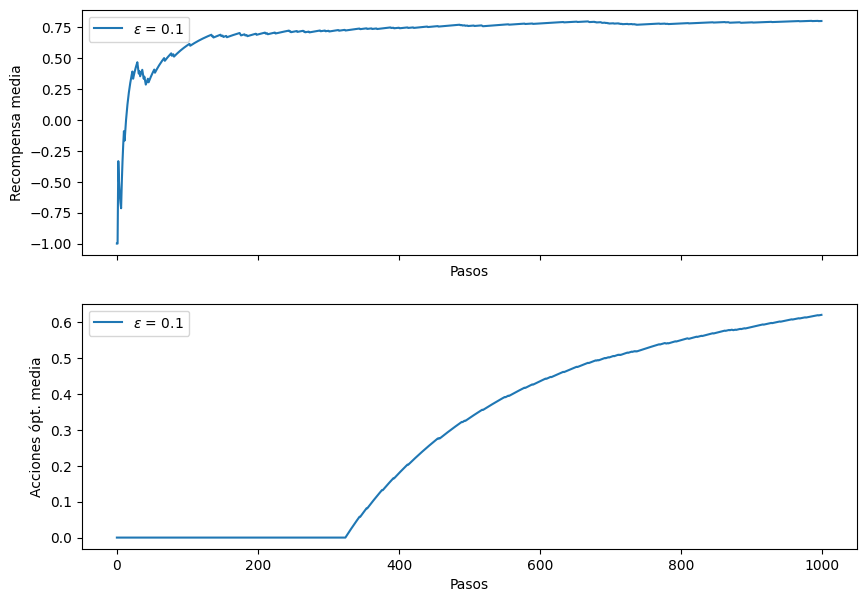

In [24]:
# Define el tamaño y el númeor de subplots
fi, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,7), sharex=True) 
# Graficamos la suma acumulada de las recompensas
ax1.plot(np.cumsum(recompensas) / (np.arange(num_pasos) + 1), 
 label=r"$\epsilon$ = {}".format(eps)) 
ax1.set_ylabel(r"Recompensa media") 
ax1.set_xlabel(r"Pasos") 
ax1.legend()
# Graficamos la suma acumulada de las acciones óptimas
ax2.plot(np.cumsum(acciones_optimas) / (np.arange(num_pasos) + 1), 
 label=r"$\epsilon$ = {}".format(eps)) 
ax2.set_ylabel(r"Acciones ópt. media") 
ax2.set_xlabel(r"Pasos") 
ax2.legend()
# Mostramos todo lo anterior
plt.show()

En la primera parte, tenemos el valor de la 
recompensa acumulada promedio, con respecto al número de pasos, que hemos 
obtenido para un valor de 𝜀𝜀 = 0.1. Como puedes notar, a medida que aumentamos los 
pasos en la simulación, vamos alcanzando un valor medio estable de las recompensas 
obtenidas. Esta tendencia se puede verificar en la segunda gráfica, en donde la 
cantidad de media de acciones óptimas seleccionadas por cada paso incrementa hasta 
un valor más o menos estable. Recuerda que, al estar dividiendo entre el número de 
pasos, lo que realmente estamos visualizando es una tasa de crecimiento tanto en las 
recompensas como en la cantidad de acciones óptimas. 

Todo parece ir bien, ¿no? ¿Pero esta es la mejor solución? ¿Será que el valor de 𝜀𝜀 es 
apropiado? ¿Nos basta con una única simulación? Vamos por partes, primero 
contestemos las dos preguntas iniciales, para ello probemos diferentes valores para la 
probabilidad 𝜀𝜀. Hagamos una pequeña variación a los dos códigos anteriores 
incluyendo diferentes valores de 𝜀𝜀 como 0.0, 0.01, 0.1, 0.5 y 1.0. Observa cómo quedó 
ahora el código con diferentes probabilidades.

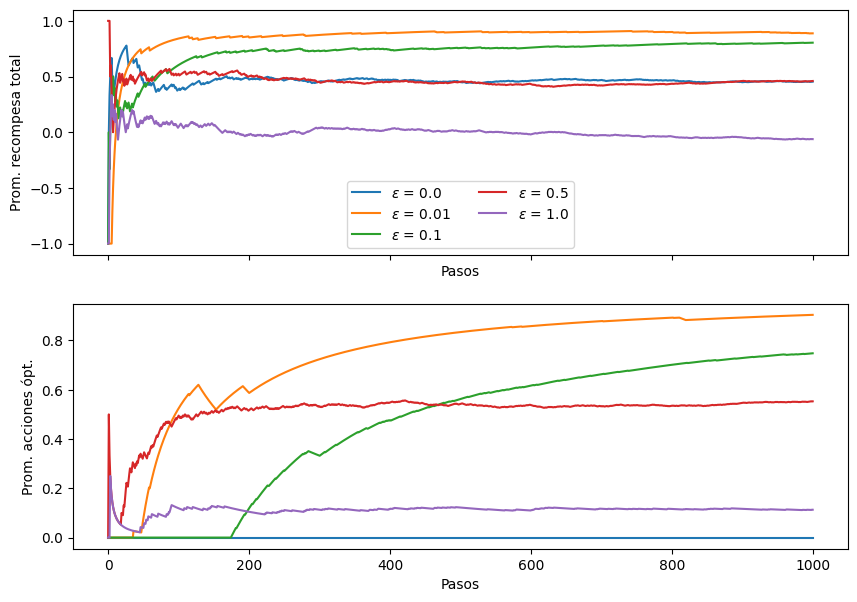

In [32]:
# Define el tamaño y el númeor de subplots
fi, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,7), sharex=True) 
plt.ion()
# Ciclo principar para diferentes valores de epsilon
for eps in [0.0, 0.01, 0.1, 0.5, 1.0]: 
    recompensas, acciones_optimas = bandido_simple(
        valor_accion_esperado, brazos=10, pasos=1000, epsilon=eps) 
    ax1.plot(np.cumsum(recompensas) / (np.arange(num_pasos) + 1),label=r"$\epsilon$ = {}".format(eps)) 
    ax2.plot(np.cumsum(acciones_optimas) / (np.arange(num_pasos) + 1), label=r"$\epsilon$ = {}".format(eps))
    ax1.set_ylabel(r"Prom. recompesa total") 
    ax1.set_xlabel(r"Pasos") 
    ax1.legend(loc='lower center', ncol=2) 
    ax2.set_ylabel(r"Prom. acciones ópt.") 
    ax2.set_xlabel(r"Pasos") 
plt.show()